## PD ARI-ARPES 150eV - LCTexample01
IPAC 2022

***
#### Imports and definitions

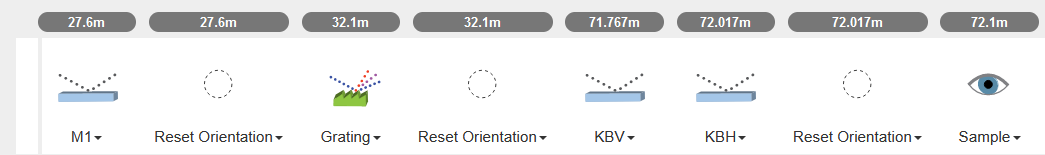

In [1]:
import numpy as np
import time as time
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from Shadow.ShadowPreprocessorsXraylib import prerefl, pre_mlayer, bragg
from pykern import pkjson
from pykern.pkcollections import PKDict
from pykern.pkdebug import pkdc, pkdp
from sirepo.template import transfer_mat_bl
from srxraylib.sources import srfunc
import Shadow
import math
import re
import scipy.linalg as sla

import py.path

from orangecontrib.shadow.util.undulator.source_undulator import SourceUndulator
from syned.storage_ring.electron_beam import ElectronBeam
from syned.storage_ring.magnetic_structures.undulator import Undulator



import os
try:
    __IPYTHON__
    import sys
    del sys.argv[1:]
except:
    pass

import srwl_bl
import srwlib
import srwlpy
import math
import srwl_uti_smp
import uti_plot_com as srw_io


from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
hfontLarge = {'fontname':'Latin Modern Roman', 'size' : 24, 'weight' : 'bold'}
hfontMed = {'fontname':'Latin Modern Roman', 'size' : 19, 'weight' : 'bold'}

display(Image('ari_beamline01.png'))

***
#### SRW simulation

##### ****Need to extract Re and Im electric fields from UR source to give to Dan****

In [2]:
def read_srw_file(filename):
    data, mode, ranges, labels, units = srw_io.file_load(filename)
    data = np.array(data).reshape((ranges[8], ranges[5]), order='C')
    return {'data': data,
            'shape': data.shape,
            'mean': np.mean(data),
            'photon_energy': ranges[0],
            'horizontal_extent': ranges[3:5],
            'vertical_extent': ranges[6:8],
            # 'mode': mode,
            'labels': labels,
            'units': units}

#### Real electric field simulation

Electron trajectory calculation ... completed
Saving trajectory data to a file ... completed
Single-electron SR calculation ... completed (lasted 3.518 s)
Extracting intensity and saving it to a file ... completed (lasted 0.017 s)
Single-electron SR calculation ... completed (lasted 65.177 s)
Extracting intensity and saving it to a file ... completed (lasted 2.979 s)
Propagation ... completed (lasted 4.643 s)
Saving Propagation Results ... completed (lasted 0.03 s)


/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/uti_plot_matplotlib.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if isDataAr: ax.pcolormesh(x, y, ar2d, cmap=self._pl.cm.Greys_r) #OC30052020
/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/uti_plot_matplotlib.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if isDataAr: ax.pcolormesh(x, y, ar2d, cmap=self._pl.cm.Greys_r) #OC30052020
/home/vagrant/.pyenv/versions/py3/li

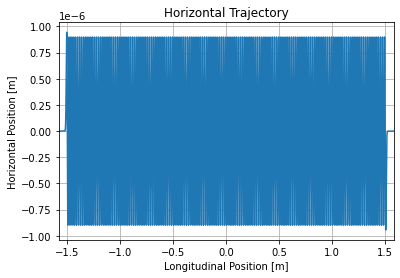

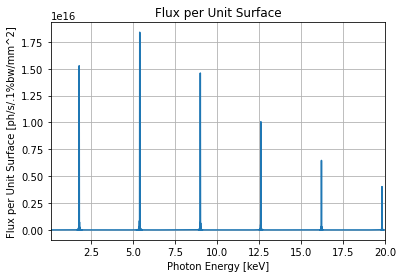

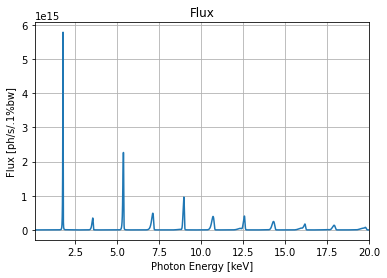

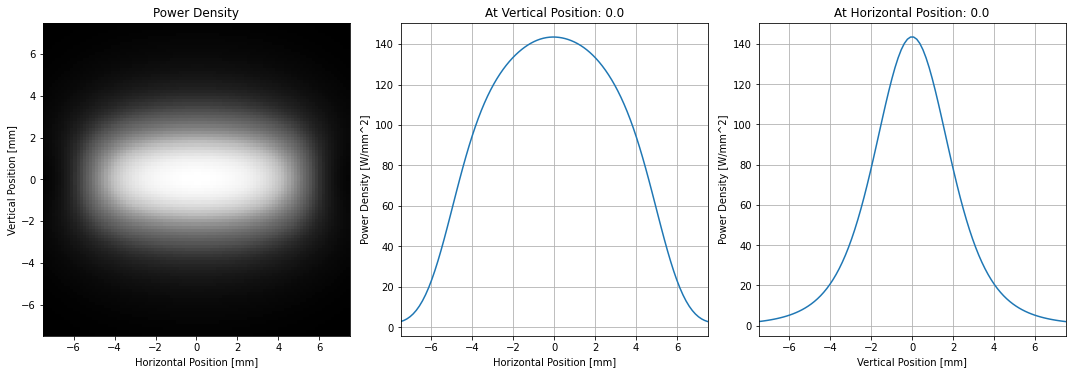

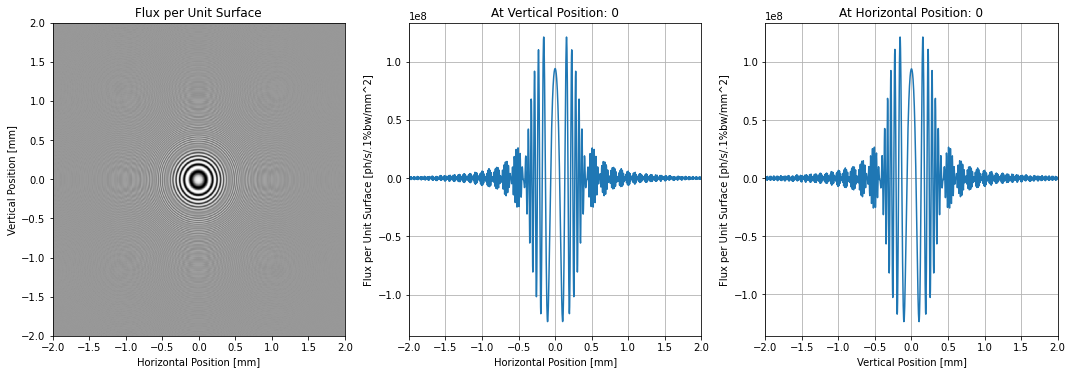

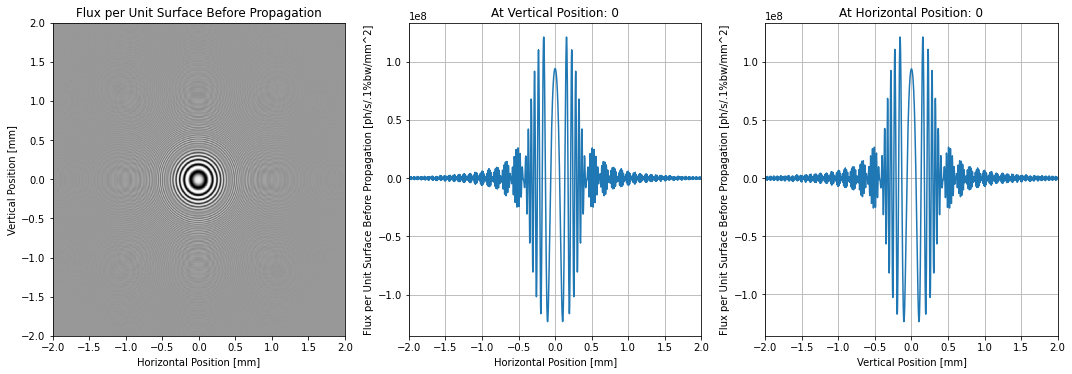

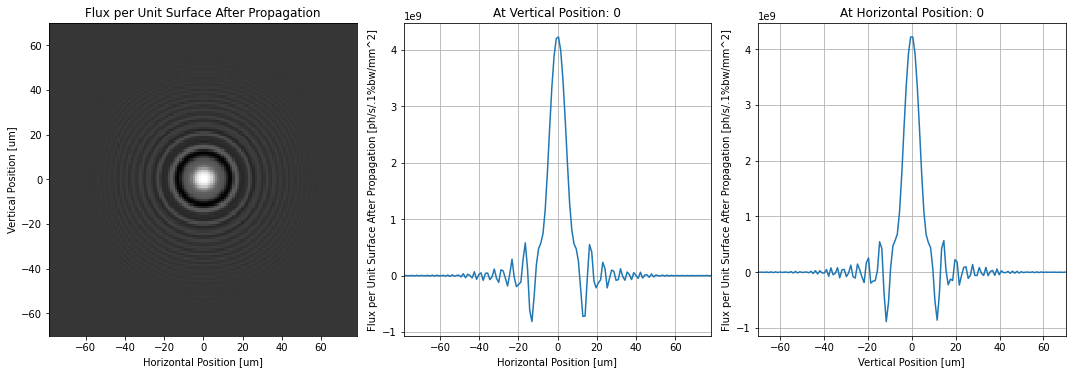

srw simulation time: 84.316 seconds

In [3]:
t0 = time.time()

def set_optics(v, names=None, want_final_propagation=True):
    el = []
    pp = []
    if not names:
        names = ['zero_drift', 'Watchpoint', 'Watchpoint_Elliptical_Cylinder', 'Elliptical_Cylinder', 'Elliptical_Cylinder_Elliptical_Cylinder2', 'Elliptical_Cylinder2', 'Elliptical_Cylinder2_Watchpoint2', 'Watchpoint2']
    for el_name in names:
        if el_name == 'zero_drift':
            # zero_drift: drift 20.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_zero_drift_L,
            ))
            pp.append(v.op_zero_drift_pp)
        elif el_name == 'Watchpoint':
            # Watchpoint: watch 20.0m
            pass
        elif el_name == 'Watchpoint_Elliptical_Cylinder':
            # Watchpoint_Elliptical_Cylinder: drift 20.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Watchpoint_Elliptical_Cylinder_L,
            ))
            pp.append(v.op_Watchpoint_Elliptical_Cylinder_pp)
        elif el_name == 'Elliptical_Cylinder':
            # Elliptical_Cylinder: ellipsoidMirror 29.0m
            el.append(srwlib.SRWLOptMirEl(
                _p=v.op_Elliptical_Cylinder_p,
                _q=v.op_Elliptical_Cylinder_q,
                _ang_graz=v.op_Elliptical_Cylinder_ang,
                _size_tang=v.op_Elliptical_Cylinder_size_tang,
                _size_sag=v.op_Elliptical_Cylinder_size_sag,
                _nvx=v.op_Elliptical_Cylinder_nvx,
                _nvy=v.op_Elliptical_Cylinder_nvy,
                _nvz=v.op_Elliptical_Cylinder_nvz,
                _tvx=v.op_Elliptical_Cylinder_tvx,
                _tvy=v.op_Elliptical_Cylinder_tvy,
                _x=v.op_Elliptical_Cylinder_x,
                _y=v.op_Elliptical_Cylinder_y,
            ))
            pp.append(v.op_Elliptical_Cylinder_pp)

        elif el_name == 'Elliptical_Cylinder_Elliptical_Cylinder2':
            # Elliptical_Cylinder_Elliptical_Cylinder2: drift 29.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Elliptical_Cylinder_Elliptical_Cylinder2_L,
            ))
            pp.append(v.op_Elliptical_Cylinder_Elliptical_Cylinder2_pp)
        elif el_name == 'Elliptical_Cylinder2':
            # Elliptical_Cylinder2: ellipsoidMirror 30.0m
            el.append(srwlib.SRWLOptMirEl(
                _p=v.op_Elliptical_Cylinder2_p,
                _q=v.op_Elliptical_Cylinder2_q,
                _ang_graz=v.op_Elliptical_Cylinder2_ang,
                _size_tang=v.op_Elliptical_Cylinder2_size_tang,
                _size_sag=v.op_Elliptical_Cylinder2_size_sag,
                _nvx=v.op_Elliptical_Cylinder2_nvx,
                _nvy=v.op_Elliptical_Cylinder2_nvy,
                _nvz=v.op_Elliptical_Cylinder2_nvz,
                _tvx=v.op_Elliptical_Cylinder2_tvx,
                _tvy=v.op_Elliptical_Cylinder2_tvy,
                _x=v.op_Elliptical_Cylinder2_x,
                _y=v.op_Elliptical_Cylinder2_y,
            ))
            pp.append(v.op_Elliptical_Cylinder2_pp)

        elif el_name == 'Elliptical_Cylinder2_Watchpoint2':
            # Elliptical_Cylinder2_Watchpoint2: drift 30.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Elliptical_Cylinder2_Watchpoint2_L,
            ))
            pp.append(v.op_Elliptical_Cylinder2_Watchpoint2_pp)
        elif el_name == 'Watchpoint2':
            # Watchpoint2: watch 38.0m
            pass
    if want_final_propagation:
        pp.append(v.op_fin_pp)

    return srwlib.SRWLOptC(el, pp)



varParam = [
    ['name', 's', 'ur_lct_example01', 'simulation name'],

#---Data Folder
    ['fdir', 's', '', 'folder (directory) name for reading-in input and saving output data files'],

#---Electron Beam
    ['ebm_nm', 's', '', 'standard electron beam name'],
    ['ebm_nms', 's', '', 'standard electron beam name suffix: e.g. can be Day1, Final'],
    ['ebm_i', 'f', 0.5, 'electron beam current [A]'],
    ['ebm_e', 'f', 3.0, 'electron beam avarage energy [GeV]'],
    ['ebm_de', 'f', 0.0, 'electron beam average energy deviation [GeV]'],
    ['ebm_x', 'f', 0.0, 'electron beam initial average horizontal position [m]'],
    ['ebm_y', 'f', 0.0, 'electron beam initial average vertical position [m]'],
    ['ebm_xp', 'f', 0.0, 'electron beam initial average horizontal angle [rad]'],
    ['ebm_yp', 'f', 0.0, 'electron beam initial average vertical angle [rad]'],
    ['ebm_z', 'f', 0., 'electron beam initial average longitudinal position [m]'],
    ['ebm_dr', 'f', -1.54, 'electron beam longitudinal drift [m] to be performed before a required calculation'],
    ['ebm_ens', 'f', 0.00089, 'electron beam relative energy spread'],
    ['ebm_emx', 'f', 5.500000000000001e-10, 'electron beam horizontal emittance [m]'],
    ['ebm_emy', 'f', 8e-12, 'electron beam vertical emittance [m]'],
    # Definition of the beam through Twiss:
    ['ebm_betax', 'f', 1.84, 'horizontal beta-function [m]'],
    ['ebm_betay', 'f', 1.17, 'vertical beta-function [m]'],
    ['ebm_alphax', 'f', 0.0, 'horizontal alpha-function [rad]'],
    ['ebm_alphay', 'f', 0.0, 'vertical alpha-function [rad]'],
    ['ebm_etax', 'f', 0.0, 'horizontal dispersion function [m]'],
    ['ebm_etay', 'f', 0.0, 'vertical dispersion function [m]'],
    ['ebm_etaxp', 'f', 0.0, 'horizontal dispersion function derivative [rad]'],
    ['ebm_etayp', 'f', 0.0, 'vertical dispersion function derivative [rad]'],

#---Undulator
    ['und_bx', 'f', 0.0, 'undulator horizontal peak magnetic field [T]'],
    ['und_by', 'f', 0.88770981, 'undulator vertical peak magnetic field [T]'],
    ['und_phx', 'f', 0.0, 'initial phase of the horizontal magnetic field [rad]'],
    ['und_phy', 'f', 0.0, 'initial phase of the vertical magnetic field [rad]'],
    ['und_b2e', '', '', 'estimate undulator fundamental photon energy (in [eV]) for the amplitude of sinusoidal magnetic field defined by und_b or und_bx, und_by', 'store_true'],
    ['und_e2b', '', '', 'estimate undulator field amplitude (in [T]) for the photon energy defined by w_e', 'store_true'],
    ['und_per', 'f', 0.02, 'undulator period [m]'],
    ['und_len', 'f', 3.0, 'undulator length [m]'],
    ['und_zc', 'f', 0.0, 'undulator center longitudinal position [m]'],
    ['und_sx', 'i', 1, 'undulator horizontal magnetic field symmetry vs longitudinal position'],
    ['und_sy', 'i', -1, 'undulator vertical magnetic field symmetry vs longitudinal position'],
    ['und_g', 'f', 6.72, 'undulator gap [mm] (assumes availability of magnetic measurement or simulation data)'],
    ['und_ph', 'f', 0.0, 'shift of magnet arrays [mm] for which the field should be set up'],
    ['und_mdir', 's', '', 'name of magnetic measurements sub-folder'],
    ['und_mfs', 's', '', 'name of magnetic measurements for different gaps summary file'],



#---Calculation Types
    # Electron Trajectory
    ['tr', '', '', 'calculate electron trajectory', 'store_true'],
    ['tr_cti', 'f', 0.0, 'initial time moment (c*t) for electron trajectory calculation [m]'],
    ['tr_ctf', 'f', 0.0, 'final time moment (c*t) for electron trajectory calculation [m]'],
    ['tr_np', 'f', 10000, 'number of points for trajectory calculation'],
    ['tr_mag', 'i', 1, 'magnetic field to be used for trajectory calculation: 1- approximate, 2- accurate'],
    ['tr_fn', 's', 'res_trj.dat', 'file name for saving calculated trajectory data'],
    ['tr_pl', 's', '', 'plot the resulting trajectiry in graph(s): ""- dont plot, otherwise the string should list the trajectory components to plot'],

    #Single-Electron Spectrum vs Photon Energy
    ['ss', '', '', 'calculate single-e spectrum vs photon energy', 'store_true'],
    ['ss_ei', 'f', 100.0, 'initial photon energy [eV] for single-e spectrum vs photon energy calculation'],
    ['ss_ef', 'f', 20000.0, 'final photon energy [eV] for single-e spectrum vs photon energy calculation'],
    ['ss_ne', 'i', 10000, 'number of points vs photon energy for single-e spectrum vs photon energy calculation'],
    ['ss_x', 'f', 0.0, 'horizontal position [m] for single-e spectrum vs photon energy calculation'],
    ['ss_y', 'f', 0.0, 'vertical position [m] for single-e spectrum vs photon energy calculation'],
    ['ss_meth', 'i', 1, 'method to use for single-e spectrum vs photon energy calculation: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler"'],
    ['ss_prec', 'f', 0.01, 'relative precision for single-e spectrum vs photon energy calculation (nominal value is 0.01)'],
    ['ss_pol', 'i', 6, 'polarization component to extract after spectrum vs photon energy calculation: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['ss_mag', 'i', 1, 'magnetic field to be used for single-e spectrum vs photon energy calculation: 1- approximate, 2- accurate'],
    ['ss_ft', 's', 'f', 'presentation/domain: "f"- frequency (photon energy), "t"- time'],
    ['ss_u', 'i', 1, 'electric field units: 0- arbitrary, 1- sqrt(Phot/s/0.1%bw/mm^2), 2- sqrt(J/eV/mm^2) or sqrt(W/mm^2), depending on representation (freq. or time)'],
    ['ss_fn', 's', 'res_spec_se.dat', 'file name for saving calculated single-e spectrum vs photon energy'],
    ['ss_pl', 's', '', 'plot the resulting single-e spectrum in a graph: ""- dont plot, "e"- show plot vs photon energy'],

    #Multi-Electron Spectrum vs Photon Energy (taking into account e-beam emittance, energy spread and collection aperture size)
    ['sm', '', '', 'calculate multi-e spectrum vs photon energy', 'store_true'],
    ['sm_ei', 'f', 100.0, 'initial photon energy [eV] for multi-e spectrum vs photon energy calculation'],
    ['sm_ef', 'f', 20000.0, 'final photon energy [eV] for multi-e spectrum vs photon energy calculation'],
    ['sm_ne', 'i', 10000, 'number of points vs photon energy for multi-e spectrum vs photon energy calculation'],
    ['sm_x', 'f', 0.0, 'horizontal center position [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_rx', 'f', 0.001, 'range of horizontal position / horizontal aperture size [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_nx', 'i', 1, 'number of points vs horizontal position for multi-e spectrum vs photon energy calculation'],
    ['sm_y', 'f', 0.0, 'vertical center position [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_ry', 'f', 0.001, 'range of vertical position / vertical aperture size [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_ny', 'i', 1, 'number of points vs vertical position for multi-e spectrum vs photon energy calculation'],
    ['sm_mag', 'i', 1, 'magnetic field to be used for calculation of multi-e spectrum spectrum or intensity distribution: 1- approximate, 2- accurate'],
    ['sm_hi', 'i', 1, 'initial UR spectral harmonic to be taken into account for multi-e spectrum vs photon energy calculation'],
    ['sm_hf', 'i', 15, 'final UR spectral harmonic to be taken into account for multi-e spectrum vs photon energy calculation'],
    ['sm_prl', 'f', 1.0, 'longitudinal integration precision parameter for multi-e spectrum vs photon energy calculation'],
    ['sm_pra', 'f', 1.0, 'azimuthal integration precision parameter for multi-e spectrum vs photon energy calculation'],
    ['sm_meth', 'i', -1, 'method to use for spectrum vs photon energy calculation in case of arbitrary input magnetic field: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler", -1- dont use this accurate integration method (rather use approximate if possible)'],
    ['sm_prec', 'f', 0.01, 'relative precision for spectrum vs photon energy calculation in case of arbitrary input magnetic field (nominal value is 0.01)'],
    ['sm_nm', 'i', 1, 'number of macro-electrons for calculation of spectrum in case of arbitrary input magnetic field'],
    ['sm_na', 'i', 5, 'number of macro-electrons to average on each node at parallel (MPI-based) calculation of spectrum in case of arbitrary input magnetic field'],
    ['sm_ns', 'i', 5, 'saving periodicity (in terms of macro-electrons) for intermediate intensity at calculation of multi-electron spectrum in case of arbitrary input magnetic field'],
    ['sm_type', 'i', 1, 'calculate flux (=1) or flux per unit surface (=2)'],
    ['sm_pol', 'i', 6, 'polarization component to extract after calculation of multi-e flux or intensity: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['sm_rm', 'i', 1, 'method for generation of pseudo-random numbers for e-beam phase-space integration: 1- standard pseudo-random number generator, 2- Halton sequences, 3- LPtau sequences (to be implemented)'],
    ['sm_fn', 's', 'res_spec_me.dat', 'file name for saving calculated milti-e spectrum vs photon energy'],
    ['sm_pl', 's', '', 'plot the resulting spectrum-e spectrum in a graph: ""- dont plot, "e"- show plot vs photon energy'],
    #to add options for the multi-e calculation from "accurate" magnetic field

    #Power Density Distribution vs horizontal and vertical position
    ['pw', '', '', 'calculate SR power density distribution', 'store_true'],
    ['pw_x', 'f', 0.0, 'central horizontal position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_rx', 'f', 0.015, 'range of horizontal position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_nx', 'i', 100, 'number of points vs horizontal position for calculation of power density distribution'],
    ['pw_y', 'f', 0.0, 'central vertical position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_ry', 'f', 0.015, 'range of vertical position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_ny', 'i', 100, 'number of points vs vertical position for calculation of power density distribution'],
    ['pw_pr', 'f', 1.0, 'precision factor for calculation of power density distribution'],
    ['pw_meth', 'i', 1, 'power density computation method (1- "near field", 2- "far field")'],
    ['pw_zst', 'f', 0., 'initial longitudinal position along electron trajectory of power density distribution (effective if pow_sst < pow_sfi)'],
    ['pw_zfi', 'f', 0., 'final longitudinal position along electron trajectory of power density distribution (effective if pow_sst < pow_sfi)'],
    ['pw_mag', 'i', 1, 'magnetic field to be used for power density calculation: 1- approximate, 2- accurate'],
    ['pw_fn', 's', 'res_pow.dat', 'file name for saving calculated power density distribution'],
    ['pw_pl', 's', '', 'plot the resulting power density distribution in a graph: ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],

    #Single-Electron Intensity distribution vs horizontal and vertical position
    ['si', '', '', 'calculate single-e intensity distribution (without wavefront propagation through a beamline) vs horizontal and vertical position', 'store_true'],
    #Single-Electron Wavefront Propagation
    ['ws', '', '', 'calculate single-electron (/ fully coherent) wavefront propagation', 'store_true'],
    #Multi-Electron (partially-coherent) Wavefront Propagation
    ['wm', '', '', 'calculate multi-electron (/ partially coherent) wavefront propagation', 'store_true'],

    ['w_e', 'f', 1799.63, 'photon energy [eV] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ef', 'f', -1.0, 'final photon energy [eV] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ne', 'i', 1, 'number of points vs photon energy for calculation of intensity distribution'],
    ['w_x', 'f', 0.0, 'central horizontal position [m] for calculation of intensity distribution'],
    ['w_rx', 'f', 0.004, 'range of horizontal position [m] for calculation of intensity distribution'],
    ['w_nx', 'i', 100, 'number of points vs horizontal position for calculation of intensity distribution'],
    ['w_y', 'f', 0.0, 'central vertical position [m] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ry', 'f', 0.004, 'range of vertical position [m] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ny', 'i', 100, 'number of points vs vertical position for calculation of intensity distribution'],
    ['w_smpf', 'f', 1.0, 'sampling factor for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_meth', 'i', 1, 'method to use for calculation of intensity distribution vs horizontal and vertical position: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler"'],
    ['w_prec', 'f', 0.01, 'relative precision for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_u', 'i', 1, 'electric field units: 0- arbitrary, 1- sqrt(Phot/s/0.1%bw/mm^2), 2- sqrt(J/eV/mm^2) or sqrt(W/mm^2), depending on representation (freq. or time)'],
    ['si_pol', 'i', 6, 'polarization component to extract after calculation of intensity distribution: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['si_type', 'i', 5, 'type of a characteristic to be extracted after calculation of intensity distribution: 0- Single-Electron Intensity, 1- Multi-Electron Intensity, 2- Single-Electron Flux, 3- Multi-Electron Flux, 4- Single-Electron Radiation Phase, 5- Re(E): Real part of Single-Electron Electric Field, 6- Im(E): Imaginary part of Single-Electron Electric Field, 7- Single-Electron Intensity, integrated over Time or Photon Energy'],
    ['w_mag', 'i', 1, 'magnetic field to be used for calculation of intensity distribution vs horizontal and vertical position: 1- approximate, 2- accurate'],

    ['si_fn', 's', 'res_int_se.dat', 'file name for saving calculated single-e intensity distribution (without wavefront propagation through a beamline) vs horizontal and vertical position'],
    ['si_pl', 's', '', 'plot the input intensity distributions in graph(s): ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],
    ['ws_fni', 's', 'res_int_pr_se.dat', 'file name for saving propagated single-e intensity distribution vs horizontal and vertical position'],
    ['ws_pl', 's', '', 'plot the resulting intensity distributions in graph(s): ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],

    ['wm_nm', 'i', 1000, 'number of macro-electrons (coherent wavefronts) for calculation of multi-electron wavefront propagation'],
    ['wm_na', 'i', 5, 'number of macro-electrons (coherent wavefronts) to average on each node for parallel (MPI-based) calculation of multi-electron wavefront propagation'],
    ['wm_ns', 'i', 5, 'saving periodicity (in terms of macro-electrons / coherent wavefronts) for intermediate intensity at multi-electron wavefront propagation calculation'],
    ['wm_ch', 'i', 0, 'type of a characteristic to be extracted after calculation of multi-electron wavefront propagation: #0- intensity (s0); 1- four Stokes components; 2- mutual intensity cut vs x; 3- mutual intensity cut vs y; 40- intensity(s0), mutual intensity cuts and degree of coherence vs X & Y'],
    ['wm_ap', 'i', 0, 'switch specifying representation of the resulting Stokes parameters: coordinate (0) or angular (1)'],
    ['wm_x0', 'f', 0.0, 'horizontal center position for mutual intensity cut calculation'],
    ['wm_y0', 'f', 0.0, 'vertical center position for mutual intensity cut calculation'],
    ['wm_ei', 'i', 0, 'integration over photon energy is required (1) or not (0); if the integration is required, the limits are taken from w_e, w_ef'],
    ['wm_rm', 'i', 1, 'method for generation of pseudo-random numbers for e-beam phase-space integration: 1- standard pseudo-random number generator, 2- Halton sequences, 3- LPtau sequences (to be implemented)'],
    ['wm_am', 'i', 0, 'multi-electron integration approximation method: 0- no approximation (use the standard 5D integration method), 1- integrate numerically only over e-beam energy spread and use convolution to treat transverse emittance'],
    ['wm_fni', 's', 'res_int_pr_me.dat', 'file name for saving propagated multi-e intensity distribution vs horizontal and vertical position'],
    ['wm_ff', 's', 'ascii', 'format of file name for saving propagated multi-e intensity distribution vs horizontal and vertical position (ascii and hdf5 supported)'],

    ['wm_nmm', 'i', 1, 'number of MPI masters to use'],
    ['wm_ncm', 'i', 100, 'number of Coherent Modes to calculate'],
    ['wm_acm', 's', 'SP', 'coherent mode decomposition algorithm to be used (supported algorithms are: "SP" for SciPy, "SPS" for SciPy Sparse, "PM" for Primme, based on names of software packages)'],
    ['wm_nop', '', '', 'switch forcing to do calculations ignoring any optics defined (by set_optics function)', 'store_true'],

    ['wm_fnmi', 's', '', 'file name of input cross-spectral density / mutual intensity; if this file name is supplied, the initial cross-spectral density (for such operations as coherent mode decomposition) will not be calculated, but rathre it will be taken from that file.'],
    ['wm_fncm', 's', '', 'file name of input coherent modes; if this file name is supplied, the eventual partially-coherent radiation propagation simulation will be done based on propagation of the coherent modes from that file.'],

    ['wm_fbk', '', '', 'create backup file(s) with propagated multi-e intensity distribution vs horizontal and vertical position and other radiation characteristics', 'store_true'],

    # Optics parameters
    ['op_r', 'f', 20.0, 'longitudinal position of the first optical element [m]'],
    # Former appParam:
    ['rs_type', 's', 'u', 'source type, (u) idealized undulator, (t), tabulated undulator, (m) multipole, (g) gaussian beam'],

#---Beamline optics:
    # zero_drift: drift
    ['op_zero_drift_L', 'f', 0, 'length'],

    # Watchpoint_Elliptical_Cylinder: drift
    ['op_Watchpoint_Elliptical_Cylinder_L', 'f', 9.0, 'length'],

    # Elliptical_Cylinder: ellipsoidMirror
    ['op_Elliptical_Cylinder_hfn', 's', '', 'heightProfileFile'],
    ['op_Elliptical_Cylinder_dim', 's', 'x', 'orientation'],
    ['op_Elliptical_Cylinder_p', 'f', 28.5, 'firstFocusLength'],
    ['op_Elliptical_Cylinder_q', 'f', 9.0, 'focalLength'],
    ['op_Elliptical_Cylinder_ang', 'f', 0.034941, 'grazingAngle'],
    ['op_Elliptical_Cylinder_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_Elliptical_Cylinder_size_tang', 'f', 0.5, 'tangentialSize'],
    ['op_Elliptical_Cylinder_size_sag', 'f', 0.5, 'sagittalSize'],
    ['op_Elliptical_Cylinder_nvx', 'f', 0.999389625362475, 'normalVectorX'],
    ['op_Elliptical_Cylinder_nvy', 'f', 0.0, 'normalVectorY'],
    ['op_Elliptical_Cylinder_nvz', 'f', -0.03493389067727645, 'normalVectorZ'],
    ['op_Elliptical_Cylinder_tvx', 'f', -0.03493389067727645, 'tangentialVectorX'],
    ['op_Elliptical_Cylinder_tvy', 'f', 0.0, 'tangentialVectorY'],
    ['op_Elliptical_Cylinder_x', 'f', 0.0, 'horizontalOffset'],
    ['op_Elliptical_Cylinder_y', 'f', 0.0, 'verticalOffset'],

    # Elliptical_Cylinder_Elliptical_Cylinder2: drift
    ['op_Elliptical_Cylinder_Elliptical_Cylinder2_L', 'f', 1.0, 'length'],

    # Elliptical_Cylinder2: ellipsoidMirror
    ['op_Elliptical_Cylinder2_hfn', 's', '', 'heightProfileFile'],
    ['op_Elliptical_Cylinder2_dim', 's', 'x', 'orientation'],
    ['op_Elliptical_Cylinder2_p', 'f', 29.5, 'firstFocusLength'],
    ['op_Elliptical_Cylinder2_q', 'f', 8.0, 'focalLength'],
    ['op_Elliptical_Cylinder2_ang', 'f', 0.034941, 'grazingAngle'],
    ['op_Elliptical_Cylinder2_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_Elliptical_Cylinder2_size_tang', 'f', 0.5, 'tangentialSize'],
    ['op_Elliptical_Cylinder2_size_sag', 'f', 0.5, 'sagittalSize'],
    ['op_Elliptical_Cylinder2_nvx', 'f', 0.0, 'normalVectorX'],
    ['op_Elliptical_Cylinder2_nvy', 'f', 0.999389625362475, 'normalVectorY'],
    ['op_Elliptical_Cylinder2_nvz', 'f', -0.03493389067727645, 'normalVectorZ'],
    ['op_Elliptical_Cylinder2_tvx', 'f', 0.0, 'tangentialVectorX'],
    ['op_Elliptical_Cylinder2_tvy', 'f', 0.03493389067727645, 'tangentialVectorY'],
    ['op_Elliptical_Cylinder2_x', 'f', 0.0, 'horizontalOffset'],
    ['op_Elliptical_Cylinder2_y', 'f', 0.0, 'verticalOffset'],

    # Elliptical_Cylinder2_Watchpoint2: drift
    ['op_Elliptical_Cylinder2_Watchpoint2_L', 'f', 8.0, 'length'],

#---Propagation parameters
    ['op_zero_drift_pp', 'f',                               [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'zero_drift'],
    ['op_Watchpoint_Elliptical_Cylinder_pp', 'f',           [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Watchpoint_Elliptical_Cylinder'],
    ['op_Elliptical_Cylinder_pp', 'f',                      [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder'],
    ['op_Elliptical_Cylinder_Elliptical_Cylinder2_pp', 'f', [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder_Elliptical_Cylinder2'],
    ['op_Elliptical_Cylinder2_pp', 'f',                     [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder2'],
    ['op_Elliptical_Cylinder2_Watchpoint2_pp', 'f',         [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder2_Watchpoint2'],
    ['op_fin_pp', 'f',                                      [0, 0, 1.0, 0, 0, 0.1, 1.0, 0.1, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'final post-propagation (resize) parameters'],

    #[ 0]: Auto-Resize (1) or not (0) Before propagation
    #[ 1]: Auto-Resize (1) or not (0) After propagation
    #[ 2]: Relative Precision for propagation with Auto-Resizing (1. is nominal)
    #[ 3]: Allow (1) or not (0) for semi-analytical treatment of the quadratic (leading) phase terms at the propagation
    #[ 4]: Do any Resizing on Fourier side, using FFT, (1) or not (0)
    #[ 5]: Horizontal Range modification factor at Resizing (1. means no modification)
    #[ 6]: Horizontal Resolution modification factor at Resizing
    #[ 7]: Vertical Range modification factor at Resizing
    #[ 8]: Vertical Resolution modification factor at Resizing
    #[ 9]: Type of wavefront Shift before Resizing (not yet implemented)
    #[10]: New Horizontal wavefront Center position after Shift (not yet implemented)
    #[11]: New Vertical wavefront Center position after Shift (not yet implemented)
    #[12]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Horizontal Coordinate
    #[13]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Vertical Coordinate
    #[14]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Longitudinal Coordinate
    #[15]: Optional: Orientation of the Horizontal Base vector of the Output Frame in the Incident Beam Frame: Horizontal Coordinate
    #[16]: Optional: Orientation of the Horizontal Base vector of the Output Frame in the Incident Beam Frame: Vertical Coordinate
]



def epilogue():
    pass


def main():
    v = srwl_bl.srwl_uti_parse_options(srwl_bl.srwl_uti_ext_options(varParam), use_sys_argv=True)
    names = ['zero_drift','Watchpoint','Watchpoint_Elliptical_Cylinder','Elliptical_Cylinder','Elliptical_Cylinder_Elliptical_Cylinder2','Elliptical_Cylinder2','Elliptical_Cylinder2_Watchpoint2','Watchpoint2']
    op = set_optics(v, names, True)
    v.ws = True
    v.ws_pl = 'xy'
    v.ss = True
    v.ss_pl = 'e'
    v.sm = True
    v.sm_pl = 'e'
    v.pw = True
    v.pw_pl = 'xy'
    v.si = True
    v.si_pl = 'xy'
    v.tr = True
    v.tr_pl = 'xz'
    srwl_bl.SRWLBeamline(_name=v.name).calc_all(v, op)

main()

epilogue()

t1 = time.time()
printmd("srw simulation time: %4.3f seconds" % ((t1 - t0)))    

In [5]:
# save real part of initial (20 m) electric field
srw_file = read_srw_file('res_int_se.dat')
ur_elec_field_2d_re = srw_file['data']

# save real part of propagated (37.5 m) electric field
srw_file_prop = read_srw_file('res_int_pr_se.dat')
ur_elec_field_2d_re_prop = srw_file_prop['data']

# srwdatax_re = np.sum(ur_elec_field_2d_re, axis = 1)
# srwdatay_re = np.sum(ur_elec_field_2d_re, axis = 0)
# hx_re = srwdatax_re['horizontal_extent']
# hy_re = srwdatay_re['vertical_extent']


# enablePrint()
print('dimension of initial (20 m) ur_elec_field_2d_re:', np.shape(ur_elec_field_2d_re))
print('dimension propagated (37.5 m) ur_elec_field_2d_re_prop:', np.shape(ur_elec_field_2d_re_prop))

dimension of initial (20 m) ur_elec_field_2d_re: (1400, 1400)
dimension propagated (37.5 m) ur_elec_field_2d_re_prop: (140, 140)


In [5]:
4/1400

0.002857142857142857

In [6]:
# save electric field data to text files
np.savetxt('ur_elec_field_2d_re_20m.txt', ur_elec_field_2d_re, fmt='%-4e')
np.savetxt('ur_elec_field_2d_re_37p5m.txt', ur_elec_field_2d_re_prop, fmt='%-4e')

##### Imaginary electric field simulation

Electron trajectory calculation ... completed
Saving trajectory data to a file ... completed
Single-electron SR calculation ... completed (lasted 3.403 s)
Extracting intensity and saving it to a file ... completed (lasted 0.015 s)
Single-electron SR calculation ... completed (lasted 65.429 s)
Extracting intensity and saving it to a file ... completed (lasted 2.945 s)
Propagation ... completed (lasted 4.589 s)
Saving Propagation Results ... completed (lasted 0.028 s)


/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/uti_plot_matplotlib.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if isDataAr: ax.pcolormesh(x, y, ar2d, cmap=self._pl.cm.Greys_r) #OC30052020
/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/uti_plot_matplotlib.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if isDataAr: ax.pcolormesh(x, y, ar2d, cmap=self._pl.cm.Greys_r) #OC30052020
/home/vagrant/.pyenv/versions/py3/li

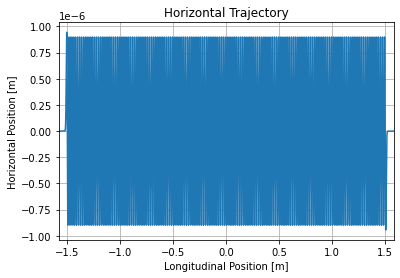

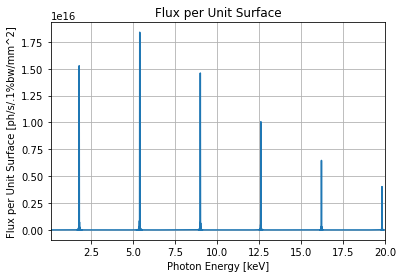

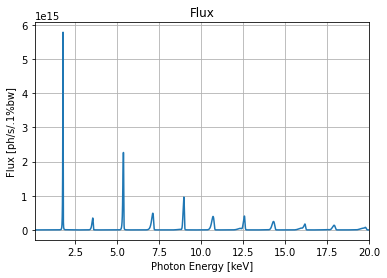

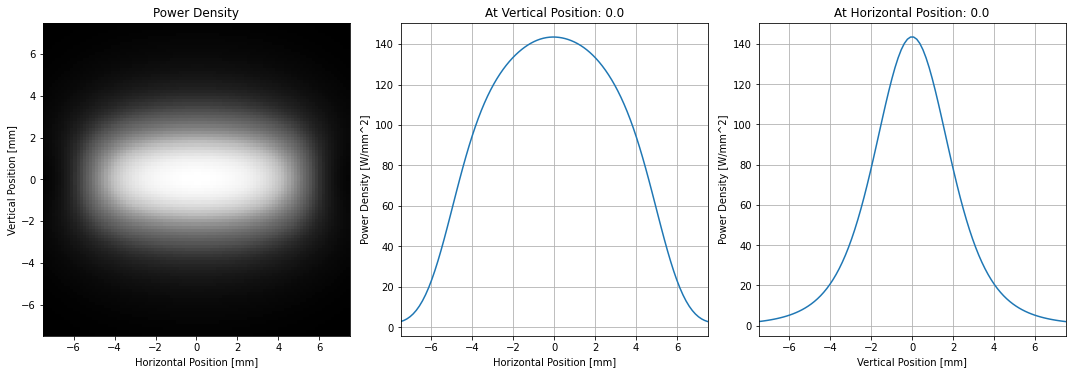

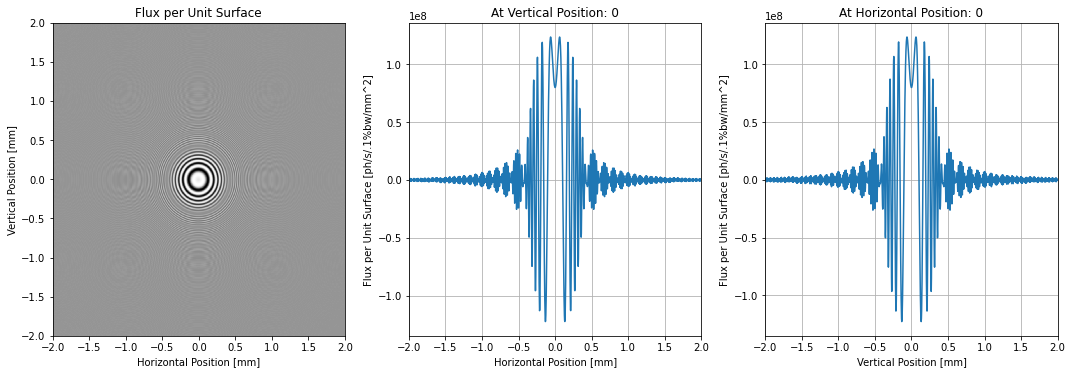

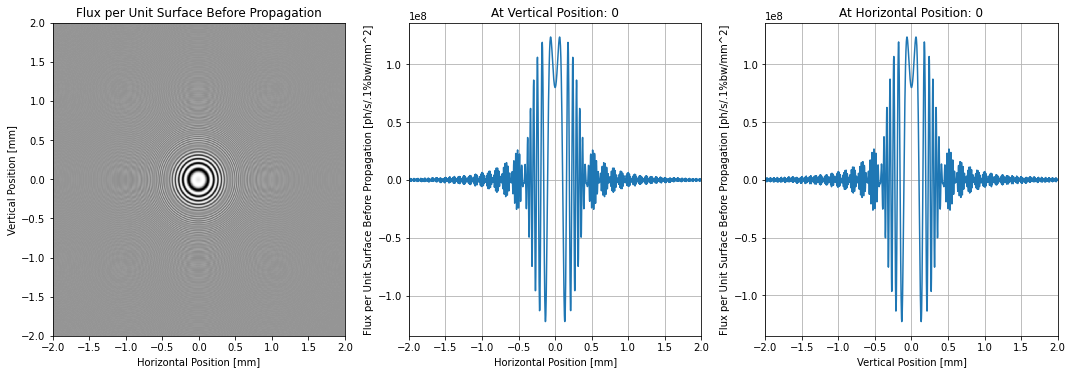

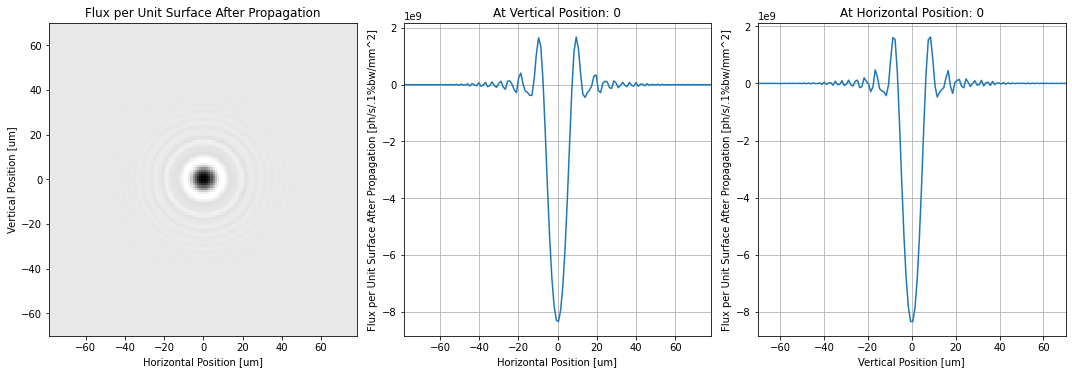

srw simulation time: 84.091 seconds

In [7]:
t0 = time.time()

def set_optics(v, names=None, want_final_propagation=True):
    el = []
    pp = []
    if not names:
        names = ['zero_drift', 'Watchpoint', 'Watchpoint_Elliptical_Cylinder', 'Elliptical_Cylinder', 'Elliptical_Cylinder_Elliptical_Cylinder2', 'Elliptical_Cylinder2', 'Elliptical_Cylinder2_Watchpoint2', 'Watchpoint2']
    for el_name in names:
        if el_name == 'zero_drift':
            # zero_drift: drift 20.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_zero_drift_L,
            ))
            pp.append(v.op_zero_drift_pp)
        elif el_name == 'Watchpoint':
            # Watchpoint: watch 20.0m
            pass
        elif el_name == 'Watchpoint_Elliptical_Cylinder':
            # Watchpoint_Elliptical_Cylinder: drift 20.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Watchpoint_Elliptical_Cylinder_L,
            ))
            pp.append(v.op_Watchpoint_Elliptical_Cylinder_pp)
        elif el_name == 'Elliptical_Cylinder':
            # Elliptical_Cylinder: ellipsoidMirror 29.0m
            el.append(srwlib.SRWLOptMirEl(
                _p=v.op_Elliptical_Cylinder_p,
                _q=v.op_Elliptical_Cylinder_q,
                _ang_graz=v.op_Elliptical_Cylinder_ang,
                _size_tang=v.op_Elliptical_Cylinder_size_tang,
                _size_sag=v.op_Elliptical_Cylinder_size_sag,
                _nvx=v.op_Elliptical_Cylinder_nvx,
                _nvy=v.op_Elliptical_Cylinder_nvy,
                _nvz=v.op_Elliptical_Cylinder_nvz,
                _tvx=v.op_Elliptical_Cylinder_tvx,
                _tvy=v.op_Elliptical_Cylinder_tvy,
                _x=v.op_Elliptical_Cylinder_x,
                _y=v.op_Elliptical_Cylinder_y,
            ))
            pp.append(v.op_Elliptical_Cylinder_pp)

        elif el_name == 'Elliptical_Cylinder_Elliptical_Cylinder2':
            # Elliptical_Cylinder_Elliptical_Cylinder2: drift 29.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Elliptical_Cylinder_Elliptical_Cylinder2_L,
            ))
            pp.append(v.op_Elliptical_Cylinder_Elliptical_Cylinder2_pp)
        elif el_name == 'Elliptical_Cylinder2':
            # Elliptical_Cylinder2: ellipsoidMirror 30.0m
            el.append(srwlib.SRWLOptMirEl(
                _p=v.op_Elliptical_Cylinder2_p,
                _q=v.op_Elliptical_Cylinder2_q,
                _ang_graz=v.op_Elliptical_Cylinder2_ang,
                _size_tang=v.op_Elliptical_Cylinder2_size_tang,
                _size_sag=v.op_Elliptical_Cylinder2_size_sag,
                _nvx=v.op_Elliptical_Cylinder2_nvx,
                _nvy=v.op_Elliptical_Cylinder2_nvy,
                _nvz=v.op_Elliptical_Cylinder2_nvz,
                _tvx=v.op_Elliptical_Cylinder2_tvx,
                _tvy=v.op_Elliptical_Cylinder2_tvy,
                _x=v.op_Elliptical_Cylinder2_x,
                _y=v.op_Elliptical_Cylinder2_y,
            ))
            pp.append(v.op_Elliptical_Cylinder2_pp)

        elif el_name == 'Elliptical_Cylinder2_Watchpoint2':
            # Elliptical_Cylinder2_Watchpoint2: drift 30.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Elliptical_Cylinder2_Watchpoint2_L,
            ))
            pp.append(v.op_Elliptical_Cylinder2_Watchpoint2_pp)
        elif el_name == 'Watchpoint2':
            # Watchpoint2: watch 38.0m
            pass
    if want_final_propagation:
        pp.append(v.op_fin_pp)

    return srwlib.SRWLOptC(el, pp)



varParam = [
    ['name', 's', 'ur_lct_example01', 'simulation name'],

#---Data Folder
    ['fdir', 's', '', 'folder (directory) name for reading-in input and saving output data files'],

#---Electron Beam
    ['ebm_nm', 's', '', 'standard electron beam name'],
    ['ebm_nms', 's', '', 'standard electron beam name suffix: e.g. can be Day1, Final'],
    ['ebm_i', 'f', 0.5, 'electron beam current [A]'],
    ['ebm_e', 'f', 3.0, 'electron beam avarage energy [GeV]'],
    ['ebm_de', 'f', 0.0, 'electron beam average energy deviation [GeV]'],
    ['ebm_x', 'f', 0.0, 'electron beam initial average horizontal position [m]'],
    ['ebm_y', 'f', 0.0, 'electron beam initial average vertical position [m]'],
    ['ebm_xp', 'f', 0.0, 'electron beam initial average horizontal angle [rad]'],
    ['ebm_yp', 'f', 0.0, 'electron beam initial average vertical angle [rad]'],
    ['ebm_z', 'f', 0., 'electron beam initial average longitudinal position [m]'],
    ['ebm_dr', 'f', -1.54, 'electron beam longitudinal drift [m] to be performed before a required calculation'],
    ['ebm_ens', 'f', 0.00089, 'electron beam relative energy spread'],
    ['ebm_emx', 'f', 5.500000000000001e-10, 'electron beam horizontal emittance [m]'],
    ['ebm_emy', 'f', 8e-12, 'electron beam vertical emittance [m]'],
    # Definition of the beam through Twiss:
    ['ebm_betax', 'f', 1.84, 'horizontal beta-function [m]'],
    ['ebm_betay', 'f', 1.17, 'vertical beta-function [m]'],
    ['ebm_alphax', 'f', 0.0, 'horizontal alpha-function [rad]'],
    ['ebm_alphay', 'f', 0.0, 'vertical alpha-function [rad]'],
    ['ebm_etax', 'f', 0.0, 'horizontal dispersion function [m]'],
    ['ebm_etay', 'f', 0.0, 'vertical dispersion function [m]'],
    ['ebm_etaxp', 'f', 0.0, 'horizontal dispersion function derivative [rad]'],
    ['ebm_etayp', 'f', 0.0, 'vertical dispersion function derivative [rad]'],

#---Undulator
    ['und_bx', 'f', 0.0, 'undulator horizontal peak magnetic field [T]'],
    ['und_by', 'f', 0.88770981, 'undulator vertical peak magnetic field [T]'],
    ['und_phx', 'f', 0.0, 'initial phase of the horizontal magnetic field [rad]'],
    ['und_phy', 'f', 0.0, 'initial phase of the vertical magnetic field [rad]'],
    ['und_b2e', '', '', 'estimate undulator fundamental photon energy (in [eV]) for the amplitude of sinusoidal magnetic field defined by und_b or und_bx, und_by', 'store_true'],
    ['und_e2b', '', '', 'estimate undulator field amplitude (in [T]) for the photon energy defined by w_e', 'store_true'],
    ['und_per', 'f', 0.02, 'undulator period [m]'],
    ['und_len', 'f', 3.0, 'undulator length [m]'],
    ['und_zc', 'f', 0.0, 'undulator center longitudinal position [m]'],
    ['und_sx', 'i', 1, 'undulator horizontal magnetic field symmetry vs longitudinal position'],
    ['und_sy', 'i', -1, 'undulator vertical magnetic field symmetry vs longitudinal position'],
    ['und_g', 'f', 6.72, 'undulator gap [mm] (assumes availability of magnetic measurement or simulation data)'],
    ['und_ph', 'f', 0.0, 'shift of magnet arrays [mm] for which the field should be set up'],
    ['und_mdir', 's', '', 'name of magnetic measurements sub-folder'],
    ['und_mfs', 's', '', 'name of magnetic measurements for different gaps summary file'],



#---Calculation Types
    # Electron Trajectory
    ['tr', '', '', 'calculate electron trajectory', 'store_true'],
    ['tr_cti', 'f', 0.0, 'initial time moment (c*t) for electron trajectory calculation [m]'],
    ['tr_ctf', 'f', 0.0, 'final time moment (c*t) for electron trajectory calculation [m]'],
    ['tr_np', 'f', 10000, 'number of points for trajectory calculation'],
    ['tr_mag', 'i', 1, 'magnetic field to be used for trajectory calculation: 1- approximate, 2- accurate'],
    ['tr_fn', 's', 'res_trj.dat', 'file name for saving calculated trajectory data'],
    ['tr_pl', 's', '', 'plot the resulting trajectiry in graph(s): ""- dont plot, otherwise the string should list the trajectory components to plot'],

    #Single-Electron Spectrum vs Photon Energy
    ['ss', '', '', 'calculate single-e spectrum vs photon energy', 'store_true'],
    ['ss_ei', 'f', 100.0, 'initial photon energy [eV] for single-e spectrum vs photon energy calculation'],
    ['ss_ef', 'f', 20000.0, 'final photon energy [eV] for single-e spectrum vs photon energy calculation'],
    ['ss_ne', 'i', 10000, 'number of points vs photon energy for single-e spectrum vs photon energy calculation'],
    ['ss_x', 'f', 0.0, 'horizontal position [m] for single-e spectrum vs photon energy calculation'],
    ['ss_y', 'f', 0.0, 'vertical position [m] for single-e spectrum vs photon energy calculation'],
    ['ss_meth', 'i', 1, 'method to use for single-e spectrum vs photon energy calculation: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler"'],
    ['ss_prec', 'f', 0.01, 'relative precision for single-e spectrum vs photon energy calculation (nominal value is 0.01)'],
    ['ss_pol', 'i', 6, 'polarization component to extract after spectrum vs photon energy calculation: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['ss_mag', 'i', 1, 'magnetic field to be used for single-e spectrum vs photon energy calculation: 1- approximate, 2- accurate'],
    ['ss_ft', 's', 'f', 'presentation/domain: "f"- frequency (photon energy), "t"- time'],
    ['ss_u', 'i', 1, 'electric field units: 0- arbitrary, 1- sqrt(Phot/s/0.1%bw/mm^2), 2- sqrt(J/eV/mm^2) or sqrt(W/mm^2), depending on representation (freq. or time)'],
    ['ss_fn', 's', 'res_spec_se.dat', 'file name for saving calculated single-e spectrum vs photon energy'],
    ['ss_pl', 's', '', 'plot the resulting single-e spectrum in a graph: ""- dont plot, "e"- show plot vs photon energy'],

    #Multi-Electron Spectrum vs Photon Energy (taking into account e-beam emittance, energy spread and collection aperture size)
    ['sm', '', '', 'calculate multi-e spectrum vs photon energy', 'store_true'],
    ['sm_ei', 'f', 100.0, 'initial photon energy [eV] for multi-e spectrum vs photon energy calculation'],
    ['sm_ef', 'f', 20000.0, 'final photon energy [eV] for multi-e spectrum vs photon energy calculation'],
    ['sm_ne', 'i', 10000, 'number of points vs photon energy for multi-e spectrum vs photon energy calculation'],
    ['sm_x', 'f', 0.0, 'horizontal center position [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_rx', 'f', 0.001, 'range of horizontal position / horizontal aperture size [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_nx', 'i', 1, 'number of points vs horizontal position for multi-e spectrum vs photon energy calculation'],
    ['sm_y', 'f', 0.0, 'vertical center position [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_ry', 'f', 0.001, 'range of vertical position / vertical aperture size [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_ny', 'i', 1, 'number of points vs vertical position for multi-e spectrum vs photon energy calculation'],
    ['sm_mag', 'i', 1, 'magnetic field to be used for calculation of multi-e spectrum spectrum or intensity distribution: 1- approximate, 2- accurate'],
    ['sm_hi', 'i', 1, 'initial UR spectral harmonic to be taken into account for multi-e spectrum vs photon energy calculation'],
    ['sm_hf', 'i', 15, 'final UR spectral harmonic to be taken into account for multi-e spectrum vs photon energy calculation'],
    ['sm_prl', 'f', 1.0, 'longitudinal integration precision parameter for multi-e spectrum vs photon energy calculation'],
    ['sm_pra', 'f', 1.0, 'azimuthal integration precision parameter for multi-e spectrum vs photon energy calculation'],
    ['sm_meth', 'i', -1, 'method to use for spectrum vs photon energy calculation in case of arbitrary input magnetic field: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler", -1- dont use this accurate integration method (rather use approximate if possible)'],
    ['sm_prec', 'f', 0.01, 'relative precision for spectrum vs photon energy calculation in case of arbitrary input magnetic field (nominal value is 0.01)'],
    ['sm_nm', 'i', 1, 'number of macro-electrons for calculation of spectrum in case of arbitrary input magnetic field'],
    ['sm_na', 'i', 5, 'number of macro-electrons to average on each node at parallel (MPI-based) calculation of spectrum in case of arbitrary input magnetic field'],
    ['sm_ns', 'i', 5, 'saving periodicity (in terms of macro-electrons) for intermediate intensity at calculation of multi-electron spectrum in case of arbitrary input magnetic field'],
    ['sm_type', 'i', 1, 'calculate flux (=1) or flux per unit surface (=2)'],
    ['sm_pol', 'i', 6, 'polarization component to extract after calculation of multi-e flux or intensity: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['sm_rm', 'i', 1, 'method for generation of pseudo-random numbers for e-beam phase-space integration: 1- standard pseudo-random number generator, 2- Halton sequences, 3- LPtau sequences (to be implemented)'],
    ['sm_fn', 's', 'res_spec_me.dat', 'file name for saving calculated milti-e spectrum vs photon energy'],
    ['sm_pl', 's', '', 'plot the resulting spectrum-e spectrum in a graph: ""- dont plot, "e"- show plot vs photon energy'],
    #to add options for the multi-e calculation from "accurate" magnetic field

    #Power Density Distribution vs horizontal and vertical position
    ['pw', '', '', 'calculate SR power density distribution', 'store_true'],
    ['pw_x', 'f', 0.0, 'central horizontal position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_rx', 'f', 0.015, 'range of horizontal position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_nx', 'i', 100, 'number of points vs horizontal position for calculation of power density distribution'],
    ['pw_y', 'f', 0.0, 'central vertical position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_ry', 'f', 0.015, 'range of vertical position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_ny', 'i', 100, 'number of points vs vertical position for calculation of power density distribution'],
    ['pw_pr', 'f', 1.0, 'precision factor for calculation of power density distribution'],
    ['pw_meth', 'i', 1, 'power density computation method (1- "near field", 2- "far field")'],
    ['pw_zst', 'f', 0., 'initial longitudinal position along electron trajectory of power density distribution (effective if pow_sst < pow_sfi)'],
    ['pw_zfi', 'f', 0., 'final longitudinal position along electron trajectory of power density distribution (effective if pow_sst < pow_sfi)'],
    ['pw_mag', 'i', 1, 'magnetic field to be used for power density calculation: 1- approximate, 2- accurate'],
    ['pw_fn', 's', 'res_pow.dat', 'file name for saving calculated power density distribution'],
    ['pw_pl', 's', '', 'plot the resulting power density distribution in a graph: ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],

    #Single-Electron Intensity distribution vs horizontal and vertical position
    ['si', '', '', 'calculate single-e intensity distribution (without wavefront propagation through a beamline) vs horizontal and vertical position', 'store_true'],
    #Single-Electron Wavefront Propagation
    ['ws', '', '', 'calculate single-electron (/ fully coherent) wavefront propagation', 'store_true'],
    #Multi-Electron (partially-coherent) Wavefront Propagation
    ['wm', '', '', 'calculate multi-electron (/ partially coherent) wavefront propagation', 'store_true'],

    ['w_e', 'f', 1799.63, 'photon energy [eV] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ef', 'f', -1.0, 'final photon energy [eV] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ne', 'i', 1, 'number of points vs photon energy for calculation of intensity distribution'],
    ['w_x', 'f', 0.0, 'central horizontal position [m] for calculation of intensity distribution'],
    ['w_rx', 'f', 0.004, 'range of horizontal position [m] for calculation of intensity distribution'],
    ['w_nx', 'i', 100, 'number of points vs horizontal position for calculation of intensity distribution'],
    ['w_y', 'f', 0.0, 'central vertical position [m] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ry', 'f', 0.004, 'range of vertical position [m] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ny', 'i', 100, 'number of points vs vertical position for calculation of intensity distribution'],
    ['w_smpf', 'f', 1.0, 'sampling factor for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_meth', 'i', 1, 'method to use for calculation of intensity distribution vs horizontal and vertical position: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler"'],
    ['w_prec', 'f', 0.01, 'relative precision for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_u', 'i', 1, 'electric field units: 0- arbitrary, 1- sqrt(Phot/s/0.1%bw/mm^2), 2- sqrt(J/eV/mm^2) or sqrt(W/mm^2), depending on representation (freq. or time)'],
    ['si_pol', 'i', 6, 'polarization component to extract after calculation of intensity distribution: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['si_type', 'i', 6, 'type of a characteristic to be extracted after calculation of intensity distribution: 0- Single-Electron Intensity, 1- Multi-Electron Intensity, 2- Single-Electron Flux, 3- Multi-Electron Flux, 4- Single-Electron Radiation Phase, 5- Re(E): Real part of Single-Electron Electric Field, 6- Im(E): Imaginary part of Single-Electron Electric Field, 7- Single-Electron Intensity, integrated over Time or Photon Energy'],
    ['w_mag', 'i', 1, 'magnetic field to be used for calculation of intensity distribution vs horizontal and vertical position: 1- approximate, 2- accurate'],

    ['si_fn', 's', 'res_int_se.dat', 'file name for saving calculated single-e intensity distribution (without wavefront propagation through a beamline) vs horizontal and vertical position'],
    ['si_pl', 's', '', 'plot the input intensity distributions in graph(s): ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],
    ['ws_fni', 's', 'res_int_pr_se.dat', 'file name for saving propagated single-e intensity distribution vs horizontal and vertical position'],
    ['ws_pl', 's', '', 'plot the resulting intensity distributions in graph(s): ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],

    ['wm_nm', 'i', 1000, 'number of macro-electrons (coherent wavefronts) for calculation of multi-electron wavefront propagation'],
    ['wm_na', 'i', 5, 'number of macro-electrons (coherent wavefronts) to average on each node for parallel (MPI-based) calculation of multi-electron wavefront propagation'],
    ['wm_ns', 'i', 5, 'saving periodicity (in terms of macro-electrons / coherent wavefronts) for intermediate intensity at multi-electron wavefront propagation calculation'],
    ['wm_ch', 'i', 0, 'type of a characteristic to be extracted after calculation of multi-electron wavefront propagation: #0- intensity (s0); 1- four Stokes components; 2- mutual intensity cut vs x; 3- mutual intensity cut vs y; 40- intensity(s0), mutual intensity cuts and degree of coherence vs X & Y'],
    ['wm_ap', 'i', 0, 'switch specifying representation of the resulting Stokes parameters: coordinate (0) or angular (1)'],
    ['wm_x0', 'f', 0.0, 'horizontal center position for mutual intensity cut calculation'],
    ['wm_y0', 'f', 0.0, 'vertical center position for mutual intensity cut calculation'],
    ['wm_ei', 'i', 0, 'integration over photon energy is required (1) or not (0); if the integration is required, the limits are taken from w_e, w_ef'],
    ['wm_rm', 'i', 1, 'method for generation of pseudo-random numbers for e-beam phase-space integration: 1- standard pseudo-random number generator, 2- Halton sequences, 3- LPtau sequences (to be implemented)'],
    ['wm_am', 'i', 0, 'multi-electron integration approximation method: 0- no approximation (use the standard 5D integration method), 1- integrate numerically only over e-beam energy spread and use convolution to treat transverse emittance'],
    ['wm_fni', 's', 'res_int_pr_me.dat', 'file name for saving propagated multi-e intensity distribution vs horizontal and vertical position'],
    ['wm_ff', 's', 'ascii', 'format of file name for saving propagated multi-e intensity distribution vs horizontal and vertical position (ascii and hdf5 supported)'],

    ['wm_nmm', 'i', 1, 'number of MPI masters to use'],
    ['wm_ncm', 'i', 100, 'number of Coherent Modes to calculate'],
    ['wm_acm', 's', 'SP', 'coherent mode decomposition algorithm to be used (supported algorithms are: "SP" for SciPy, "SPS" for SciPy Sparse, "PM" for Primme, based on names of software packages)'],
    ['wm_nop', '', '', 'switch forcing to do calculations ignoring any optics defined (by set_optics function)', 'store_true'],

    ['wm_fnmi', 's', '', 'file name of input cross-spectral density / mutual intensity; if this file name is supplied, the initial cross-spectral density (for such operations as coherent mode decomposition) will not be calculated, but rathre it will be taken from that file.'],
    ['wm_fncm', 's', '', 'file name of input coherent modes; if this file name is supplied, the eventual partially-coherent radiation propagation simulation will be done based on propagation of the coherent modes from that file.'],

    ['wm_fbk', '', '', 'create backup file(s) with propagated multi-e intensity distribution vs horizontal and vertical position and other radiation characteristics', 'store_true'],

    # Optics parameters
    ['op_r', 'f', 20.0, 'longitudinal position of the first optical element [m]'],
    # Former appParam:
    ['rs_type', 's', 'u', 'source type, (u) idealized undulator, (t), tabulated undulator, (m) multipole, (g) gaussian beam'],

#---Beamline optics:
    # zero_drift: drift
    ['op_zero_drift_L', 'f', 0, 'length'],

    # Watchpoint_Elliptical_Cylinder: drift
    ['op_Watchpoint_Elliptical_Cylinder_L', 'f', 9.0, 'length'],

    # Elliptical_Cylinder: ellipsoidMirror
    ['op_Elliptical_Cylinder_hfn', 's', '', 'heightProfileFile'],
    ['op_Elliptical_Cylinder_dim', 's', 'x', 'orientation'],
    ['op_Elliptical_Cylinder_p', 'f', 28.5, 'firstFocusLength'],
    ['op_Elliptical_Cylinder_q', 'f', 9.0, 'focalLength'],
    ['op_Elliptical_Cylinder_ang', 'f', 0.034941, 'grazingAngle'],
    ['op_Elliptical_Cylinder_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_Elliptical_Cylinder_size_tang', 'f', 0.5, 'tangentialSize'],
    ['op_Elliptical_Cylinder_size_sag', 'f', 0.5, 'sagittalSize'],
    ['op_Elliptical_Cylinder_nvx', 'f', 0.999389625362475, 'normalVectorX'],
    ['op_Elliptical_Cylinder_nvy', 'f', 0.0, 'normalVectorY'],
    ['op_Elliptical_Cylinder_nvz', 'f', -0.03493389067727645, 'normalVectorZ'],
    ['op_Elliptical_Cylinder_tvx', 'f', -0.03493389067727645, 'tangentialVectorX'],
    ['op_Elliptical_Cylinder_tvy', 'f', 0.0, 'tangentialVectorY'],
    ['op_Elliptical_Cylinder_x', 'f', 0.0, 'horizontalOffset'],
    ['op_Elliptical_Cylinder_y', 'f', 0.0, 'verticalOffset'],

    # Elliptical_Cylinder_Elliptical_Cylinder2: drift
    ['op_Elliptical_Cylinder_Elliptical_Cylinder2_L', 'f', 1.0, 'length'],

    # Elliptical_Cylinder2: ellipsoidMirror
    ['op_Elliptical_Cylinder2_hfn', 's', '', 'heightProfileFile'],
    ['op_Elliptical_Cylinder2_dim', 's', 'x', 'orientation'],
    ['op_Elliptical_Cylinder2_p', 'f', 29.5, 'firstFocusLength'],
    ['op_Elliptical_Cylinder2_q', 'f', 8.0, 'focalLength'],
    ['op_Elliptical_Cylinder2_ang', 'f', 0.034941, 'grazingAngle'],
    ['op_Elliptical_Cylinder2_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_Elliptical_Cylinder2_size_tang', 'f', 0.5, 'tangentialSize'],
    ['op_Elliptical_Cylinder2_size_sag', 'f', 0.5, 'sagittalSize'],
    ['op_Elliptical_Cylinder2_nvx', 'f', 0.0, 'normalVectorX'],
    ['op_Elliptical_Cylinder2_nvy', 'f', 0.999389625362475, 'normalVectorY'],
    ['op_Elliptical_Cylinder2_nvz', 'f', -0.03493389067727645, 'normalVectorZ'],
    ['op_Elliptical_Cylinder2_tvx', 'f', 0.0, 'tangentialVectorX'],
    ['op_Elliptical_Cylinder2_tvy', 'f', 0.03493389067727645, 'tangentialVectorY'],
    ['op_Elliptical_Cylinder2_x', 'f', 0.0, 'horizontalOffset'],
    ['op_Elliptical_Cylinder2_y', 'f', 0.0, 'verticalOffset'],

    # Elliptical_Cylinder2_Watchpoint2: drift
    ['op_Elliptical_Cylinder2_Watchpoint2_L', 'f', 8.0, 'length'],

#---Propagation parameters
    ['op_zero_drift_pp', 'f',                               [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'zero_drift'],
    ['op_Watchpoint_Elliptical_Cylinder_pp', 'f',           [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Watchpoint_Elliptical_Cylinder'],
    ['op_Elliptical_Cylinder_pp', 'f',                      [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder'],
    ['op_Elliptical_Cylinder_Elliptical_Cylinder2_pp', 'f', [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder_Elliptical_Cylinder2'],
    ['op_Elliptical_Cylinder2_pp', 'f',                     [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder2'],
    ['op_Elliptical_Cylinder2_Watchpoint2_pp', 'f',         [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder2_Watchpoint2'],
    ['op_fin_pp', 'f',                                      [0, 0, 1.0, 0, 0, 0.1, 1.0, 0.1, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'final post-propagation (resize) parameters'],

    #[ 0]: Auto-Resize (1) or not (0) Before propagation
    #[ 1]: Auto-Resize (1) or not (0) After propagation
    #[ 2]: Relative Precision for propagation with Auto-Resizing (1. is nominal)
    #[ 3]: Allow (1) or not (0) for semi-analytical treatment of the quadratic (leading) phase terms at the propagation
    #[ 4]: Do any Resizing on Fourier side, using FFT, (1) or not (0)
    #[ 5]: Horizontal Range modification factor at Resizing (1. means no modification)
    #[ 6]: Horizontal Resolution modification factor at Resizing
    #[ 7]: Vertical Range modification factor at Resizing
    #[ 8]: Vertical Resolution modification factor at Resizing
    #[ 9]: Type of wavefront Shift before Resizing (not yet implemented)
    #[10]: New Horizontal wavefront Center position after Shift (not yet implemented)
    #[11]: New Vertical wavefront Center position after Shift (not yet implemented)
    #[12]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Horizontal Coordinate
    #[13]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Vertical Coordinate
    #[14]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Longitudinal Coordinate
    #[15]: Optional: Orientation of the Horizontal Base vector of the Output Frame in the Incident Beam Frame: Horizontal Coordinate
    #[16]: Optional: Orientation of the Horizontal Base vector of the Output Frame in the Incident Beam Frame: Vertical Coordinate
]



def epilogue():
    pass


def main():
    v = srwl_bl.srwl_uti_parse_options(srwl_bl.srwl_uti_ext_options(varParam), use_sys_argv=True)
    names = ['zero_drift','Watchpoint','Watchpoint_Elliptical_Cylinder','Elliptical_Cylinder','Elliptical_Cylinder_Elliptical_Cylinder2','Elliptical_Cylinder2','Elliptical_Cylinder2_Watchpoint2','Watchpoint2']
    op = set_optics(v, names, True)
    v.ws = True
    v.ws_pl = 'xy'
    v.ss = True
    v.ss_pl = 'e'
    v.sm = True
    v.sm_pl = 'e'
    v.pw = True
    v.pw_pl = 'xy'
    v.si = True
    v.si_pl = 'xy'
    v.tr = True
    v.tr_pl = 'xz'
    srwl_bl.SRWLBeamline(_name=v.name).calc_all(v, op)

main()

epilogue()

t1 = time.time()
printmd("srw simulation time: %4.3f seconds" % ((t1 - t0)))    

In [8]:
# save imaginary part of initial (20 m) electric field
srw_file = read_srw_file('res_int_se.dat')
ur_elec_field_2d_im = srw_file['data']

# save imaginary part of propagated (37.5 m) electric field
srw_file_prop = read_srw_file('res_int_pr_se.dat')
ur_elec_field_2d_im_prop = srw_file_prop['data']

# srwdatax_re = np.sum(ur_elec_field_2d_re, axis = 1)
# srwdatay_re = np.sum(ur_elec_field_2d_re, axis = 0)
# hx_re = srwdatax_re['horizontal_extent']
# hy_re = srwdatay_re['vertical_extent']


# enablePrint()
print('initial (20 m) dimension ur_elec_field_2d_im:', np.shape(ur_elec_field_2d_im))
print('propagated (37.5 m) dimension ur_elec_field_2d_im:', np.shape(ur_elec_field_2d_im_prop))

initial (20 m) dimension ur_elec_field_2d_im: (1400, 1400)
propagated (37.5 m) dimension ur_elec_field_2d_im: (140, 140)


In [ ]:
# save electric field data to text files
np.savetxt('ur_elec_field_2d_im_20m.txt', ur_elec_field_2d_im, fmt='%-4e')
np.savetxt('ur_elec_field_2d_im_37p5m.txt', ur_elec_field_2d_im_prop, fmt='%-4e')

***
#### Shadow simulation and transfer matrix calculation

In [10]:
alpha = 0         # coordinate system rotation angle [rad]
epsilon = 1e-06   # offset small parameter for transfer matrix calculation 
# energy = 2500.0   # photon energy [eV]
energy = 3000.0   # photon energy [eV]

In [11]:
# from https://github.com/radiasoft/rslight/blob/main/Gaussian/gauss_apert-01.py

#  Propagate a 4x4 covariance matrix Sigma through a Gaussian aperture of (Gaussian, not not hard-edge)
#  size parameters a_gx, a_gy
#  NB:  assumed ordering of the variables is x, y, theta_x, theta_y
def gauss_apert_4x4(Sigma, lambda_rad, a_gx, a_gy):
    """
    Compute new sigma matrix after passing through a Gaussian aperture.
    
    Sigma: second moment matrix
    lambda_rad: radiation wavelength [m]
    a_gx: effective Gaussian aperture sigma (x-component)
    a_gy: effective Gaussian aperture sigma (y-component)
    
    Note: assumed ordering of the variables is x, y, theta_x, theta_y
    """
    
    Sigma_inv = sla.inv(Sigma)
    A = 1.0 *Sigma_inv[0:2,0:2]
    B = 1.0 *Sigma_inv[0:2,2:4]
    C = numpy.transpose(B)
    D = 1.0 *Sigma_inv[2:4,2:4]

    A_A = numpy.zeros([2,2], dtype=numpy.float32)
    A_A[0,0] = 2. /a_gx**2
    A_A[1,1] = 2. /a_gy**2

    D_inv = sla.inv(D)
    D_A_inv = numpy.zeros([2,2], dtype=numpy.float32)
    D_A_inv[0,0] = 1. /a_gx**2
    D_A_inv[1,1] = 1. /a_gy**2
    D_A_inv *= lambda_rad**2 /(8. *numpy.pi *numpy.pi)

    D_f = sla.inv(D_inv +D_A_inv)
    BDi = numpy.matmul(B, D_inv)
    DiC = numpy.matmul(D_inv, C)  #  == numpy.transpose(BDi)
    C_f = numpy.matmul(D_f, DiC)
    B_f = numpy.transpose(C_f)    #  ==  numpy.matmul(BDi, D_f)
    A_f = A +A_A -numpy.matmul(BDi, C) +numpy.matmul(BDi, numpy.matmul(D_f, DiC))

    Sigma_inv[0:2,0:2] = 1.0 *A_f
    Sigma_inv[0:2,2:4] = 1.0 *B_f
    Sigma_inv[2:4,0:2] = 1.0 *C_f
    Sigma_inv[2:4,2:4] = 1.0 *D_f

    return sla.inv(Sigma_inv)

In [12]:
def rays_sigma(rays, idx):
    """
    Compute the sigma value of a given ray coordinate.
    
    rays: Shadow ray object
    idx: index of ray element
    """
    
    return numpy.sqrt(numpy.mean(rays[:, idx] ** 2))

def create_sigma_matrix():
    """
    Creates a sigma matrix from Shadow source parameters.
    """
    # need to prime seed prior to calculate_rays SEED to get reproducible results
    numpy.random.seed(1)

    ebeam = ElectronBeam(
        energy_in_GeV=3.0,
        energy_spread=0.00089,
        current=0.5,
        number_of_bunches=1,
    )
    ebeam.set_twiss_all(
      5.500000000000001e-10, # emitx
      0.0, # alphax
      1.84, # betax
      0.0, # etax
      0.0, # etapx
      8e-12, # emity
      0.0, # alphay
      1.17, # betay
      0.0, # etay
      0.0, # etapy
    )
    sourceundulator = SourceUndulator(
        syned_electron_beam=ebeam,
        syned_undulator=Undulator(
            K_horizontal=0.0,
            K_vertical=1.65776086,
            period_length=0.02,
            number_of_periods=150,
        ),
        flag_emittance=1,
        flag_size=1,
        # emin=10000.0,
        # emax=11000.0,
        # ng_e=11,
        # maxangle=3.13658e-05,
        ng_t=31,
        ng_p=21,
        ng_j=20,
        code_undul_phot="internal",
    )

    sourceundulator.set_energy_monochromatic_at_resonance(1)

    rays = sourceundulator.calculate_rays(
        user_unit_to_m=0.01,
        F_COHER=1,
        SEED=567656,
        NRAYS=100000,
    )
    beam = Shadow.Beam(N=rays.shape[0])
    beam.rays = rays


    # source = Shadow.Source()
    # beam = Shadow.Beam()
    # source.NPOINT = 10000
    # source.ISTAR1 = 567656
    # source.SIGMAX = 0.012526741356
    # source.SIGMAZ = 0.001341640786
    # source.EPSI_X = 5.500000000000001e-08
    # source.EPSI_Z = 8e-10
    # source.BENER = 3.0
    # source.EPSI_DX = 0.0
    # source.EPSI_DZ = 0.0
    # source.F_POL = 3
    # source.HDIV1 = 0.0005
    # source.HDIV2 = 0.0005
    # source.VDIV1 = 1.0
    # source.VDIV2 = 1.0
    # source.F_PHOT = 0
    # source.FSOURCE_DEPTH = 4
    # source.F_COLOR = 3
    # source.R_MAGNET = 25.0173071398614
    # source.PH1 = 2500.0
    # source.PH2 = 2500.001
    # source.FDISTR = 4
    # source.R_ALADDIN = source.R_MAGNET * 100
    # beam.genSource(source)
    # rays = beam.rays
    sigmax = rays_sigma(rays, 0)
    sigdix = rays_sigma(rays, 3)
    sigmaz = rays_sigma(rays, 2)
    sigdiz = rays_sigma(rays, 5)
    res = numpy.matrix([
        [sigmax ** 2, 0, 0, 0],
        [0, sigdix ** 2, 0, 0],
        [0, 0, sigmaz ** 2, 0],
        [0, 0, 0, sigdiz ** 2],
    ])
    pkdp('sigma_mat:\n{}', res)
    return res



# def create_sigma_matrix():
#     """
#     Creates a sigma matrix from Shadow source parameters.
#     """
    
#     source = Shadow.Source()
#     beam = Shadow.Beam()
#     source.NPOINT = 10000
#     source.ISTAR1 = 567656
#     source.SIGMAX = 0.012526741356
#     source.SIGMAZ = 0.001341640786
#     source.EPSI_X = 5.500000000000001e-08
#     source.EPSI_Z = 8e-10
#     source.BENER = 3.0
#     source.EPSI_DX = 0.0
#     source.EPSI_DZ = 0.0
#     source.F_POL = 3
#     source.HDIV1 = 0.0005
#     source.HDIV2 = 0.0005
#     source.VDIV1 = 1.0
#     source.VDIV2 = 1.0
#     source.F_PHOT = 0
#     source.FSOURCE_DEPTH = 4
#     source.F_COLOR = 3
#     source.R_MAGNET = 25.0173071398614
#     source.PH1 = 2500.0
#     source.PH2 = 2500.001
#     source.FDISTR = 4
#     source.R_ALADDIN = source.R_MAGNET * 100
#     beam.genSource(source)
#     rays = beam.rays
#     sigmax = rays_sigma(rays, 0)
#     sigdix = rays_sigma(rays, 3)
#     sigmaz = rays_sigma(rays, 2)
#     sigdiz = rays_sigma(rays, 5)
#     res = numpy.matrix([
#         [sigmax ** 2, 0, 0, 0],
#         [0, sigdix ** 2, 0, 0],
#         [0, 0, sigmaz ** 2, 0],
#         [0, 0, 0, sigdiz ** 2],
#     ])
#     pkdp('sigma_mat:\n{}', res)
#     return res

def apply_aperture(oe, mat):
    # def apply_aperture(oe, beam, mat):
    """
    Transform to correct phase space ordering and apply Gaussian 
    aperture formula to produce propagated sigma matrix.
    oe: Shadow aperture optical element object
    mat: input sigma matrix in the format x, x', y, y'
    """
    
    pkdp('aperture size [m]: {} x {}',
         oe.RX_SLIT[0] * 1e-2,
         oe.RZ_SLIT[0] * 1e-2)
    Pmat = numpy.array([
        [1.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 1.0, 0.0],
        [0.0, 1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 1.0]])
    res = gauss_apert_4x4(
        # Convert Sigma to x, y, xp, yp, via Pmat Sigma Pmat (since Pmat is symmetric)
        numpy.matmul(numpy.matmul(Pmat, mat), Pmat),
        # wavelength [cm]
        1.2398419843320026 / energy * 1e-6 * 1e2,
        # aperture x, y [cm]
        oe.RX_SLIT[0],
        oe.RZ_SLIT[0],
    )
    return numpy.matmul(numpy.matmul(Pmat, res), Pmat)

def assert_no_lost_rays(beam):
    """
    Test to make sure no rays have been lost.
    beam: Shadow beam object
    """
    
    lost = []
    LOST_RAY_FLAG = 9
    for i in range(len(beam.rays)):
        if beam.rays[i][LOST_RAY_FLAG] != 1:
            lost.append(i)
    if len(lost):
        raise AssertionError(
            'Lost tracking particle(s) # {}'.format(
                ', '.join(str(v) for v in lost)),
        )

In [13]:
def calculate_stats(pos, oe, beam):
    """
    
    beam: Shadow beam object with propagated rays
    """
    
    global alpha
    
    #TODO(pjm): this calculates the Tmat for the constant sigma_mat
    # need to compute the Tmat element by element instead
    Tmat, x_prop_cen, xp_prop_cen, z_prop_cen, zp_prop_cen = transfer_mat_bl.tmat_calc(beam.duplicate(), epsilon)
    res = Tmat * sigma_mat * numpy.transpose(Tmat)
    pos += (oe.T_SOURCE if oe else 0)
    if oe:
        # oe.ALPHA is in radians after traceOE()
        alpha = int(alpha + 180 / math.pi * oe.ALPHA) % 360
    beam_stats.append(PKDict(
        isRotated=True if alpha == 90 or alpha == 270 else False,
        s=pos * 1e-2,
        x=x_prop_cen,
        xp=xp_prop_cen,
        z=z_prop_cen,
        zp=zp_prop_cen,
        matrix=Tmat.tolist(),
        sigma_mx=res.tolist(),
        sigmax=math.sqrt(res[0, 0]) * 1e-2,
        sigdix=math.sqrt(res[1, 1]),
        sigmaz=math.sqrt(res[2, 2]) * 1e-2,
        sigdiz=math.sqrt(res[3, 3]),
    ))
    if oe and oe.I_STOP[0] == 0 and oe.RX_SLIT[0] != 0 and oe.RZ_SLIT[0] != 0:
        #TODO(pjm): the element is an aperture
        res2 = apply_aperture(oe, beam, res)
        #TODO(pjm): need to compute and save the new matrix with the aperture changes
        pkdp('matrix before aperture:\n{}', res)
        pkdp('matrix after aperture:\n{}', res2)
    
    print('transfer matrix:')
    print(Tmat)
    
    return pos

def divide_drift(pos, beam, count, distance, divisions=100):
    if distance < 1e-3:
        return
    for i in range(divisions):
        oe = Shadow.OE()
        oe.DUMMY = 1.0
        oe.set_empty(ALPHA=0)
        oe.FWRITE = 3
        oe.T_IMAGE = 0.0
        oe.T_SOURCE = distance / divisions
        beam.traceOE(oe, count)
        count += 1
        pos = calculate_stats(pos, oe, beam)
    return pos

def process_stats():
    def compute_angx(x, z, xz, scale=1):
        x = numpy.array(x)
        z = numpy.array(z)
        xz = numpy.array(xz)
        return ((1/2) * numpy.arctan(2 * scale * xz / (x ** 2 - z ** 2))).tolist()

    def rotated_values(stats, field):
        if field == 'sigmaxz':
            return [-v.sigma_mx[0][2] if v.isRotated else v.sigma_mx[0][2] for v in stats]
        if field == 'sigmaxpzp':
            return [-v.sigma_mx[1][3] if v.isRotated else v.sigma_mx[1][3] for v in stats]
        if re.search('z', field):
            f = re.sub('z', 'x', field)
        else:
            f = re.sub('x', 'z', field)
        return [v[f] if v.isRotated else v[field] for v in stats]

    res = PKDict(
        s=[v.s for v in beam_stats],
    )
    for f in ('sigmax', 'sigdix', 'sigmaz', 'sigdiz', 'sigmaxz', 'sigmaxpzp', 'x', 'xp', 'z', 'zp'):
        res[f] = rotated_values(beam_stats, f)
    res.angxz = compute_angx(res.sigmax, res.sigmaz, res.sigmaxz, scale=1e-4)
    res.angxpzp = compute_angx(res.sigdix, res.sigdiz, res.sigmaxpzp)
    return res

In [14]:
def run_shadow_simulation():
    pkdp('starting shadow simulation')
    beam = transfer_mat_bl.create_mat_rays(epsilon, energy)
    pkdp('initial beam: {}', beam)
    pos = calculate_stats(0, None, beam)

    # pos = divide_drift(pos, beam, 1, 1000.0)

    # mirror 1
    oe = Shadow.OE()
    oe.DUMMY = 1.0
    oe.FMIRR = 2
    oe.ALPHA = 90
    oe.FHIT_C = 1
    oe.F_EXT = 0
    oe.F_DEFAULT = 0
    oe.SSOUR = 2850.0
    oe.SIMAG = 900.0
    oe.THETA = 87.99802816803339
    oe.F_CONVEX = 0
    oe.FCYL = 1
    oe.CIL_ANG = 0.0
    oe.FSHAPE = 1
    oe.RWIDX1 = 25.0
    oe.RWIDX2 = 25.0
    oe.RLEN1 = 25.0
    oe.RLEN2 = 25.0
    oe.T_INCIDENCE = 87.99802816803339
    oe.T_REFLECTION = 87.99802816803339
    oe.FWRITE = 3
    oe.T_IMAGE = 0.0
    oe.T_SOURCE = 2900.0
    beam.traceOE(oe, 1)
    
    pos = calculate_stats(pos, oe, beam)

    # pos = divide_drift(pos, beam, 102, 2900.0)
    
    # reset orientation
    oe = Shadow.OE()
    oe.DUMMY = 1.0
    oe.set_empty(ALPHA=270)
    oe.FWRITE = 3
    oe.T_IMAGE = 0.0
    oe.T_SOURCE = 0.0
    beam.traceOE(oe, 2)
    pos = calculate_stats(pos, oe, beam)

    # pos = divide_drift(pos, beam, 203, 2900.0)
    
    # mirror 2
    oe = Shadow.OE()
    oe.DUMMY = 1.0
    oe.FMIRR = 2
    oe.ALPHA = 0
    oe.FHIT_C = 1
    oe.F_EXT = 0
    oe.F_DEFAULT = 0
    oe.SSOUR = 2950.0
    oe.SIMAG = 800.0
    oe.THETA = 87.99802816803339
    oe.F_CONVEX = 0
    oe.FCYL = 1
    oe.CIL_ANG = 0.0
    oe.FSHAPE = 1
    oe.RWIDX1 = 25.0
    oe.RWIDX2 = 25.0
    oe.RLEN1 = 25.0
    oe.RLEN2 = 25.0
    oe.T_INCIDENCE = 87.99802816803339
    oe.T_REFLECTION = 87.99802816803339
    oe.FWRITE = 3
    oe.T_IMAGE = 0.0
    oe.T_SOURCE = 100.0
    beam.traceOE(oe, 3)
    
    pos = calculate_stats(pos, oe, beam)

    # pos = divide_drift(pos, beam, 304, 3000.0)

    
    
    # watchpoint
    oe = Shadow.OE()
    oe.DUMMY = 1.0
    oe.set_empty()
    oe.FWRITE = 3
    oe.T_IMAGE = 0.0
    oe.T_SOURCE = 800.0
    beam.traceOE(oe, 4)
    # beam.write('shadow-output.dat')
    pos = calculate_stats(pos, oe, beam)

    assert_no_lost_rays(beam)
    return process_stats()

In [15]:
# def run_shadow_simulation():
#     pkdp('starting shadow simulation')
#     beam = transfer_mat_bl.create_mat_rays(epsilon, energy)
#     pkdp('initial beam: {}', beam)
#     pos = calculate_stats(0, None, beam)

#     pos = divide_drift(pos, beam, 1, 1000.0)

#     # mirror 1
#     oe = Shadow.OE()
#     oe.DUMMY = 1.0
#     oe.FMIRR = 2
#     oe.ALPHA = 90
#     oe.FHIT_C = 1
#     oe.F_EXT = 0
#     oe.F_DEFAULT = 0
#     oe.SSOUR = 2850.0
#     oe.SIMAG = 900.0
#     oe.THETA = 89.79373519375291
#     oe.F_CONVEX = 0
#     oe.FCYL = 1
#     oe.CIL_ANG = 0.0
#     oe.FSHAPE = 1
#     oe.RWIDX1 = 25.0
#     oe.RWIDX2 = 25.0
#     oe.RLEN1 = 25.0
#     oe.RLEN2 = 25.0
#     oe.T_INCIDENCE = 89.79373519375291
#     oe.T_REFLECTION = 89.79373519375291
#     oe.FWRITE = 3
#     oe.T_IMAGE = 0.0
#     oe.T_SOURCE = 2900.0
#     beam.traceOE(oe, 1)

#     pos = calculate_stats(pos, oe, beam)

#     pos = divide_drift(pos, beam, 102, 100.0)
    
#     # reset orientation
#     oe = Shadow.OE()
#     oe.DUMMY = 1.0
#     oe.set_empty(ALPHA=270)
#     oe.FWRITE = 3
#     oe.T_IMAGE = 0.0
#     oe.T_SOURCE = 0.0
#     beam.traceOE(oe, 2)
#     pos = calculate_stats(pos, oe, beam)

#     pos = divide_drift(pos, beam, 203, 1557.0)
    
#     # toroid mirror
#     oe = Shadow.OE()
#     oe.DUMMY = 1.0
#     oe.FMIRR = 3
#     oe.ALPHA = 0
#     oe.FHIT_C = 1
#     oe.F_EXT = 1
#     oe.F_TORUS = 0
#     oe.R_MAJ = 2450000.0
#     oe.R_MIN = 18.6
#     oe.FSHAPE = 1
#     oe.RWIDX1 = 4.0
#     oe.RWIDX2 = 4.0
#     oe.RLEN1 = 48.0
#     oe.RLEN2 = 48.0
#     oe.T_INCIDENCE = 89.59892954340842
#     oe.T_REFLECTION = 89.59892954340842
#     oe.FWRITE = 3
#     oe.T_IMAGE = 0.0
#     oe.T_SOURCE = 0
#     beam.traceOE(oe, 303)
#     pos = calculate_stats(pos, oe, beam)

#     pos = divide_drift(pos, beam, 304, 2657.2000000000007)

#     # 0.02 x 0.02 aperture [cm]
#     oe = Shadow.OE()
#     oe.DUMMY = 1.0
#     oe.set_empty().set_screens()
#     oe.I_SLIT[0] = 1
#     oe.K_SLIT[0] = 0
#     oe.I_STOP[0] = 0
#     oe.RX_SLIT[0] = 0.02
#     oe.RZ_SLIT[0] = 0.02
#     oe.CX_SLIT[0] = 0.0
#     oe.CZ_SLIT[0] = 0.0
#     oe.FWRITE = 3
#     oe.T_IMAGE = 0.0
#     oe.T_SOURCE = 0
#     beam.traceOE(oe, 404)
#     pos = calculate_stats(pos, oe, beam)

#     pos = divide_drift(pos, beam, 405, 357.2999999999993)
    
#     # horizontal ellipsoid mirror
#     oe = Shadow.OE()
#     oe.DUMMY = 1.0
#     oe.FMIRR = 2
#     oe.ALPHA = 90
#     oe.FHIT_C = 1
#     oe.F_EXT = 0
#     oe.F_DEFAULT = 0
#     oe.SSOUR = 357.3
#     oe.SIMAG = 42.699999999999996
#     oe.THETA = 89.79373519375291
#     oe.F_CONVEX = 0
#     oe.FCYL = 1
#     oe.CIL_ANG = 0.0
#     oe.FSHAPE = 1
#     oe.RWIDX1 = 1.0
#     oe.RWIDX2 = 1.0
#     oe.RLEN1 = 16.0
#     oe.RLEN2 = 16.0
#     oe.T_INCIDENCE = 89.79373519375291
#     oe.T_REFLECTION = 89.79373519375291
#     oe.FWRITE = 3
#     oe.T_IMAGE = 0.0
#     oe.T_SOURCE = 0
#     beam.traceOE(oe, 505)
#     pos = calculate_stats(pos, oe, beam)

#     # reset Shadow orientation to correct for horizontal mirror
#     oe = Shadow.OE()
#     oe.DUMMY = 1.0
#     oe.set_empty(ALPHA=270)
#     oe.FWRITE = 3
#     oe.T_IMAGE = 0.0
#     oe.T_SOURCE = 0.0
#     beam.traceOE(oe, 506)
#     pos = calculate_stats(pos, oe, beam)

#     pos = divide_drift(pos, beam, 507, 25.699999999999818)

#     # vertical ellipsoid mirror
#     oe = Shadow.OE()
#     oe.DUMMY = 1.0
#     oe.FMIRR = 2
#     oe.ALPHA = 0
#     oe.FHIT_C = 1
#     oe.F_EXT = 0
#     oe.F_DEFAULT = 0
#     oe.SSOUR = 383.0
#     oe.SIMAG = 17.0
#     oe.THETA = 89.79373519375291
#     oe.F_CONVEX = 0
#     oe.FCYL = 1
#     oe.CIL_ANG = 0.0
#     oe.FSHAPE = 1
#     oe.RWIDX1 = 1.0
#     oe.RWIDX2 = 1.0
#     oe.RLEN1 = 9.0
#     oe.RLEN2 = 9.0
#     oe.T_INCIDENCE = 89.79373519375291
#     oe.T_REFLECTION = 89.79373519375291
#     oe.FWRITE = 3
#     oe.T_IMAGE = 0.0
#     oe.T_SOURCE = 0
#     beam.traceOE(oe, 607)
#     pos = calculate_stats(pos, oe, beam)

#     pos = divide_drift(pos, beam, 608, 17.00000000000091)
    
#     # watchpoint
#     oe = Shadow.OE()
#     oe.DUMMY = 1.0
#     oe.set_empty()
#     oe.FWRITE = 3
#     oe.T_IMAGE = 0.0
#     oe.T_SOURCE = 0
#     beam.traceOE(oe, 708)
#     pos = calculate_stats(pos, oe, beam)

#     assert_no_lost_rays(beam)
#     return process_stats()

In [16]:
# enable and block print statements for trimming Shadow output

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__


print('This will print')

# blockPrint()
print("This won't")

# enablePrint()
print("This will too")



This will print
This won't
This will too


In [17]:
# blockPrint()
# print("This won't")

In [20]:
# blockPrint()
import numpy
beam_stats = []
sigma_mat = create_sigma_matrix()
stats = run_shadow_simulation()

Calculating energy 1800.000 eV (1 of 1)
 Exit from SOURCE
transfer matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
 Call to RESET
transfer matrix: Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC

[[ 6.12323400e-17  1.77573786e-13  1.00000000e+00  2.90000000e+03]
 [ 0.00000000e+00  6.12323400e-17  0.00000000e+00  1.00000000e+00]
 [ 1.00000016e+00  2.89982414e+03  1.36239194e-07  2.26504019e-07]
 [-1.46198837e-03 -3.23957281e+00 -8.32667268e-11 -1.04083409e-10]]
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx fil

/tmp/ipykernel_1956/4009322120.py:104:create_sigma_matrix sigma_mat:
[[1.05529012e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.70158476e-10 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.89980050e-07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.72408654e-11]]
/tmp/ipykernel_1956/890954702.py:2:run_shadow_simulation starting shadow simulation
/tmp/ipykernel_1956/890954702.py:4:run_shadow_simulation initial beam: <Shadow.ShadowLibExtensions.Beam object at 0x7f705dab5188>


In [ ]:
# stats.keys

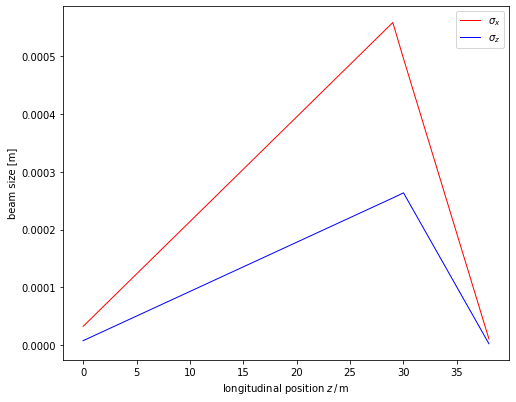

In [21]:
# plot stats.s vs sigmax, sigmaz
fig = plt.figure(figsize=(8,6.5))
ax = fig.gca()
ax.plot(stats.s, stats.sigmax,'r-', lw = 1, label = r'$\sigma_x$')
ax.plot(stats.s, stats.sigmaz,'b-', lw = 1, label = r'$\sigma_z$')
ax.set_xlabel(r'longitudinal position $z\,/\,\mathrm{m}$')
ax.set_ylabel(r'beam size [m]')
ax.legend()
# plt.xlim(0, 38)
# plt.ylim(0, 0.0012)
fig.show()

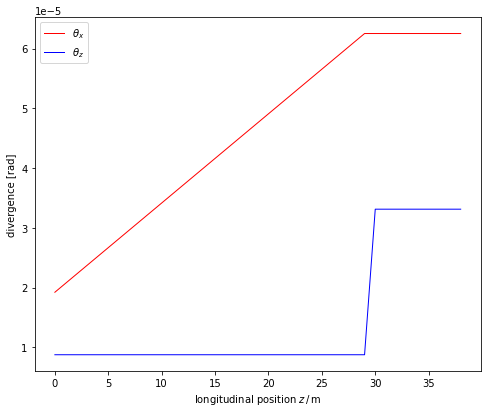

In [22]:
# plot stats.s vs sigmax, sigmaz
fig = plt.figure(figsize=(8,6.5))
ax = fig.gca()
ax.plot(stats.s, stats.sigdix,'r-', lw = 1, label = r'$\theta_{x}$')
ax.plot(stats.s, stats.sigdiz,'b-', lw = 1, label = r'$\theta_{z}$')
ax.set_xlabel(r'longitudinal position $z\,/\,\mathrm{m}$')
ax.set_ylabel(r'divergence [rad]')
ax.legend()
# plt.xlim(0, 38)
# plt.ylim(0, 0.0012)
fig.show()

In [ ]:
pkjson.dump_pretty(beam_stats, filename='beam_stats.json');

In [ ]:
beam_stats = pkjson.load_any(py.path.local('beam_stats.json'))

sigmax = [record.sigmax for record in beam_stats]
sigmaz = [record.sigmaz for record in beam_stats]
sigdix = [record.sigdix for record in beam_stats]
sigdiz = [record.sigdiz for record in beam_stats]

x = [record.s for record in beam_stats]
y1 = [record.sigmaz if record.isRotated else record.sigmax for record in beam_stats]
y2 = [record.sigmax if record.isRotated else record.sigmaz for record in beam_stats]

plt.figure(figsize=(12,4))
# plt.title("population inversion density")
plt.plot(x, sigmaz, x, sigmax)
plt.xlim(0, 38)
plt.ylim(0, 0.0012)
plt.show()

In [ ]:
stats

In [ ]:
import numpy as np

In [ ]:
test1 = process_stats()

In [ ]:
np.shape(test1)

In [ ]:
print(np.shape(test1[0]))

In [ ]:
print(type(test1))

In [ ]:
type(test1)

In [ ]:
data = list(test1.items())

In [ ]:
an_array = np. array(data)
print(an_array)